# Unsupervised learning

Table of contents

✔ Chapter 1.  k-means

Chapter 2. PCA

To install further python libraries, type

`!pip install --target=$my_path [LIBRARY_NAME]`

# Chapter 1-1. Implement from scratch



*   Reference: Kaggle



1. Initialize the centroids by selecting k centroids randomly from the training data

In [ ]:
import numpy as np

def initialize_random_centroids(self, X):
    centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
    for k in range(self.K): # iterations of 
        centroid = X[np.random.choice(range(self.num_examples))] # random centroids
        centroids[k] = centroid
    return centroids # return random centroids


2. Assign the cluster

In [ ]:
def create_cluster(self, X, centroids):
    clusters = [[] for _ in range(self.K)]
    for point_idx, point in enumerate(X):
        closest_centroid = np.argmin(
            np.sqrt(np.sum((point-centroids)**2, axis=1))
        ) # closest centroid using euclidean distance equation(calculate distance of every point from centroid)
        clusters[closest_centroid].append(point_idx)
    return clusters

3. update the centroids

In [ ]:
def calculate_new_centroids(self, cluster, X):
    centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
    for idx, cluster in enumerate(cluster):
        new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
        centroids[idx] = new_centroid
    return centroids

4. predict the cluster using new points

In [ ]:
def predict_cluster(self, clusters, X):
    y_pred = np.zeros(self.num_examples) # row1 fillup with zero
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_pred[sample_idx] = cluster_idx
    return y_pred

Then, let's make fit function

In [ ]:
def fit(self, X):
    # 1. initialize random centroids
    centroids = self.initialize_random_centroids(X) 
    for _ in range(self.max_iterations):
        # 2. assign cluster
        clusters = self.create_cluster(X, centroids) 
        previous_centroids = centroids


        # 3. update centroids
        centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
        diff = centroids - previous_centroids # calculate difference
        if not diff.any():
            break

    # 4. Predict the cluster using (again) X
    y_pred = self.predict_cluster(clusters, X) # predict function
    if self.plot_figure: # if true
        self.plot_fig(X, y_pred) # plot function 
    return y_pred

The following is the k-means class

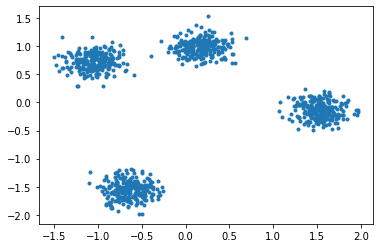

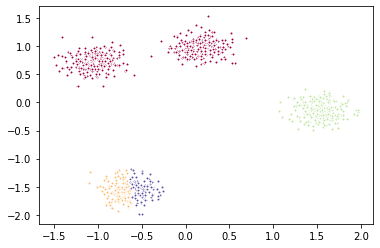

In [ ]:
import numpy as np # linear algebra
import os
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns

class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euclidean distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    # plotinng scatter plot
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], color=y)
        fig.show() # visualize
        
    # fit data
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) # initialize random centroids
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any(): # no more updates needed then stop the loop
                break
        y_pred = self.predict_cluster(clusters, X) # predict function
        
        fig=plt.figure(figsize=(6,4))
        ax=fig.add_subplot(1,1,1)
        colors=plt.cm.Spectral(np.linspace(0,1,4))

        for k, col in zip(range(4),colors):
          points=(y_pred==k)
          ax.plot(X[points,0],X[points,1],'w',markerfacecolor=col,marker='.')
        plt.show()
        return y_pred
            
if __name__ == "__main__":
    np.random.seed(10)
    num_clusters = 4 # num of cluster
    X, true_labels = make_blobs(n_samples=1000, centers=num_clusters, cluster_std=0.9, random_state=42)
    X = StandardScaler().fit_transform(X)
    plt.scatter(X[:,0],X[:,1],marker=".")
    Kmeans = KMeansClustering(X, num_clusters)
    y_pred = Kmeans.fit(X)



Try to improve the way to select centroids

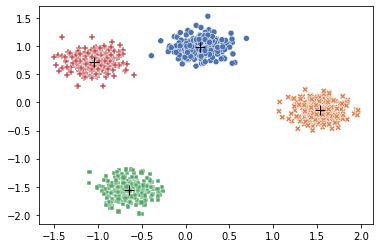

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Initialize only the first centroid
        # then the rest are initialized with probabilities proportional to their distances to the first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances (i.e., p=dists)
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        
        # Iterate, adjusting centroids until converged or until passed max_iter
        # np.not_equal(self.centroids, prev_centroids): Check the convergence
        iteration = 0
        prev_centroids = None
        # .any(): returns True if at least one True exists
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            prev_centroids = self.centroids
            # Update the centroids using mean of the points belonging to them
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points, then just keep the previous centroid
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            # pick the nearest centroid
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

# Create a dataset of 2D distributions
centers = 4
X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=0.9, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit k-means to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# Visualize results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()

# Chapter 1-2. Use scikit-learn library






In [ ]:
from sklearn.cluster import KMeans


In [ ]:
k_means=KMeans(n_clusters=4,n_init=10)
k_means.fit(X)

KMeans(n_clusters=4)

In [ ]:
print('predicted lable for each sample: ',k_means.labels_)
print('centroids: ',k_means.cluster_centers_)

predicted lable for each sample:  [1 0 0 2 2 0 2 0 0 2 2 1 3 0 0 0 3 3 3 2 2 1 1 1 2 2 3 3 0 2 0 0 0 3 3 1 0
 2 1 1 2 0 2 1 2 1 3 2 1 2 0 3 2 1 3 1 3 3 3 0 0 3 0 1 2 3 0 0 2 3 1 3 2 0
 2 1 2 3 2 3 0 3 3 3 2 1 0 0 3 3 3 3 2 2 1 2 1 3 2 0 2 1 1 3 1 2 2 3 0 3 1
 0 2 2 2 2 0 1 0 2 3 0 1 2 1 0 2 1 0 2 3 0 2 1 2 1 3 0 2 2 3 3 1 1 1 2 2 3
 3 3 3 1 0 0 3 2 3 2 2 1 0 3 2 0 3 3 2 0 1 0 2 3 3 2 3 1 0 1 0 1 2 2 3 0 3
 0 2 1 3 0 2 3 2 2 3 1 0 0 0 1 3 0 2 3 2 2 0 3 2 0 0 1 0 0 2 3 0 3 1 2 1 1
 0 3 1 3 2 0 0 3 3 0 3 1 0 0 1 0 0 2 0 1 0 2 1 3 2 3 2 2 2 2 1 2 2 0 3 0 0
 2 2 2 1 2 1 1 0 2 3 1 2 3 2 0 3 1 2 1 0 2 1 0 1 2 0 3 3 0 3 1 1 3 0 0 0 3
 0 0 0 3 0 1 0 1 3 0 1 2 1 1 0 1 1 2 0 1 2 3 1 1 0 0 0 2 1 0 3 0 3 3 0 0 1
 1 0 3 1 2 1 2 1 0 0 2 3 2 1 1 3 3 3 3 3 2 3 3 0 2 3 1 2 0 0 2 1 2 1 1 1 0
 2 2 2 2 3 2 3 0 2 3 0 2 1 2 2 1 3 1 0 1 0 3 1 3 1 1 0 2 2 2 3 1 3 2 2 1 2
 3 3 1 2 3 1 0 1 0 0 3 1 2 3 2 3 3 3 1 0 1 2 0 3 3 1 3 1 0 1 0 0 3 1 1 1 2
 3 3 2 2 0 1 1 1 2 3 1 3 0 0 2 3 2 2 3 3 2 2 0 0 2 3 1 2 2 1 1 0 1

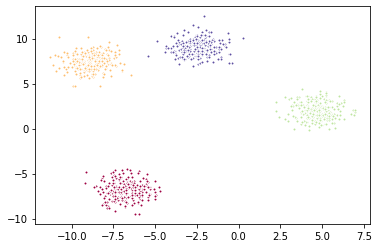

In [ ]:
y_pred=k_means.labels_

fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(1,1,1)
colors=plt.cm.Spectral(np.linspace(0,1,4))

for k, col in zip(range(4),colors):
  points=(y_pred==k)
  ax.plot(X[points,0],X[points,1],'w',markerfacecolor=col,marker='.')
plt.show()

Use elbow method (i.e., Sum of squared distances of samples to their closest centroid) to find the optimal k

In [ ]:
distortions=[]
for k in range(1,10):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

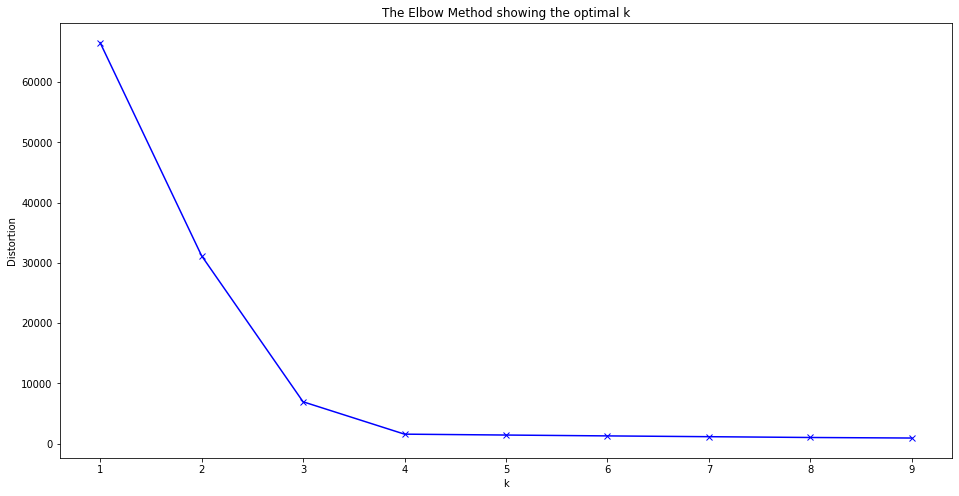

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Thus, the elbow is 4 in this case.

Table of contents

Chapter 1.  k-means

✔ Chapter 2. PCA

# Chapter 2-1. Implement from scratch



*   data: sklearn iris dataset

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


1. Normalize the data

In [ ]:
def mean(x): # np.mean(X, axis = 0)  
    return sum(x)/len(x)  

def std(x): # np.std(X, axis = 0)
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
    return (X - mean(X))/std(X)

X_std = Standardize_data(X)

2. Compute the covariance matrix

In [ ]:
def covariance(x): 
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std) # np.cov(X_std.T)

3. Find the eigen vectors and eigen values of the covariance matrix

In [ ]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat) 

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

4. Sort eigen values and vectors in descending order (to pick top K principal components

In [ ]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

5. Choose k principal components (k < number of features)

In [ ]:
k = 2
W = eig_vecs_sorted[:k, :]

6. Compute variance according to k

In [ ]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)

print('Explained variance: {}'.format(explained_variance))

plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

7. Project the data

In [ ]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)

plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components')
plt.show()


Put all together in class PCA

In [ ]:
import numpy as np
class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components   
        
    def fit(self, X):
        # Standardize data 
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean) / self.scale
        
        # compute covariance matrix       
        cov_mat = np.cov(X_std.T)
        # Eigendecomposition of covariance matrix     
        eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
        
        # Adjusting the eigenvectors that are largest in absolute value to be positive    
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T
       
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = eig_vecs_sorted[:self.n_components,:]
        
        # Explained variance ratio
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)
        
        return X_proj
# ---------------------------------------------------------
my_pca = PCA(n_components = 2).fit(X)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
X_proj = my_pca.transform(X)
print('Transformed data shape from scratch:', X_proj.shape)

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio from scratch:
 [0.7296244541329989, 0.22850761786701754]
Transformed data shape from scratch: (150, 2)


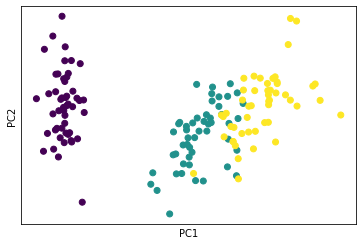

In [ ]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.show()

# Chapter 2-2. Use scikit-learn library


Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio:
 [0.72962445 0.22850762]
Transformed data shape: (150, 2)


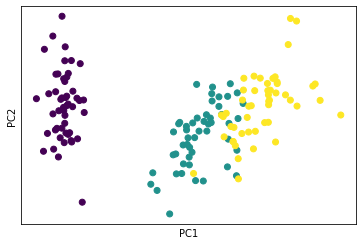

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.show()